In [1]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [105]:
df=pd.read_csv('../data/ps6_trainvalid.csv')
df_test=pd.read_csv('../data/ps6_test.csv')
n=len(df)
df=df.append(df_test,ignore_index=True)

In [106]:
df=df.fillna(method='ffill')
df.isna().sum()
df

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,293.550000,24.0,1016.0,sky is clear,19.0,1.0
45249,2017-11-29 21:00:00,295.680000,21.0,1016.0,sky is clear,19.0,1.0
45250,2017-11-29 22:00:00,295.960000,23.0,1015.0,sky is clear,19.0,1.0
45251,2017-11-29 23:00:00,295.650000,14.0,1016.0,sky is clear,200.0,2.0


In [107]:
date_time=pd.to_datetime(df.pop('datetime'),format='%Y.%m.%d %H:%M:%S')

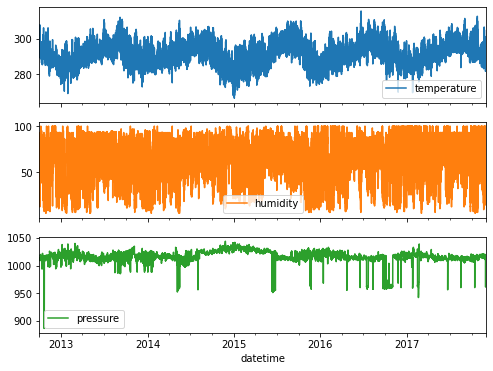

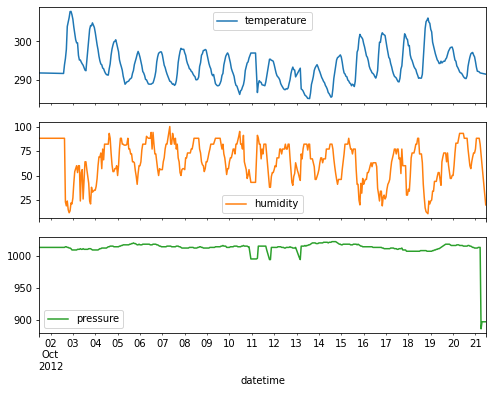

In [108]:
plot_cols = ['temperature', 'humidity', 'pressure']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [109]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,45253.0,290.845773,6.460845,266.503667,286.38,290.53,295.08,315.47
humidity,45253.0,62.682717,21.878357,5.000000,48.00,66.00,81.00,100.00
pressure,45253.0,1015.873047,11.457275,886.000000,1013.00,1016.00,1021.00,1044.00
wind_direction,45253.0,139.546527,105.592357,0.000000,29.00,140.00,230.00,360.00
wind_speed,45253.0,1.219521,1.434547,0.000000,0.00,1.00,2.00,17.00


In [110]:
wv = df.pop('wind_speed')

# Convert to radians.
wd_rad = df.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

In [111]:
df

,temperature,humidity,pressure,weather,Wx,Wy
0,291.870000,88.0,1013.0,mist,0.000000,0.000000
1,291.870000,88.0,1013.0,mist,0.000000,0.000000
2,291.868186,88.0,1013.0,sky is clear,0.000000,0.000000
3,291.862844,88.0,1013.0,sky is clear,0.000000,0.000000
4,291.857503,88.0,1013.0,sky is clear,0.000000,0.000000
...,...,...,...,...,...,...
45248,293.550000,24.0,1016.0,sky is clear,0.945519,0.325568
45249,295.680000,21.0,1016.0,sky is clear,0.945519,0.325568
45250,295.960000,23.0,1015.0,sky is clear,0.945519,0.325568
45251,295.650000,14.0,1016.0,sky is clear,-1.879385,-0.684040


(-11.0, 13.0, -15.974774553360445, 10.724622203665692)

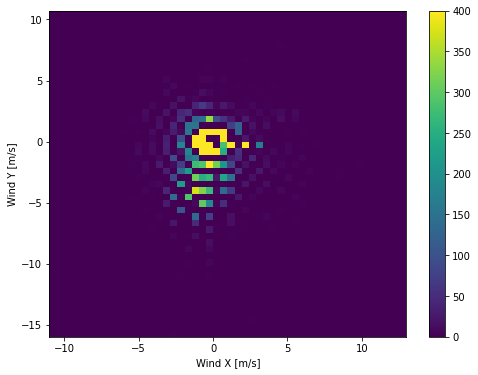

In [112]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [113]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [114]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

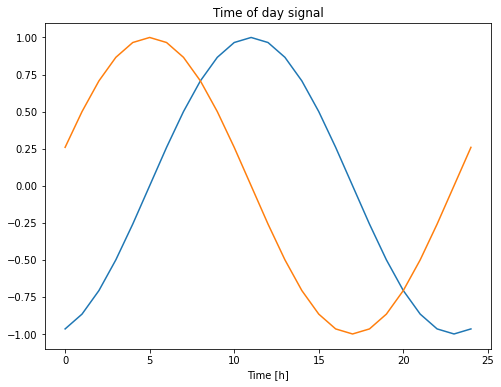

In [115]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

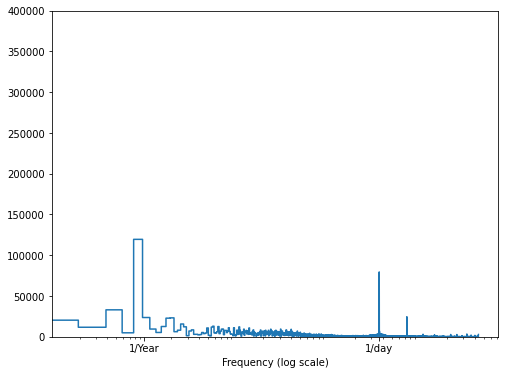

In [116]:
fft = tf.signal.rfft(df['temperature'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperature'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [117]:
weather=df.pop('weather')

In [384]:
column_indices = {name: i for i, name in enumerate(df.columns)}
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n)]
test_df = df[int(n):]

num_features = df.shape[1]

In [385]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

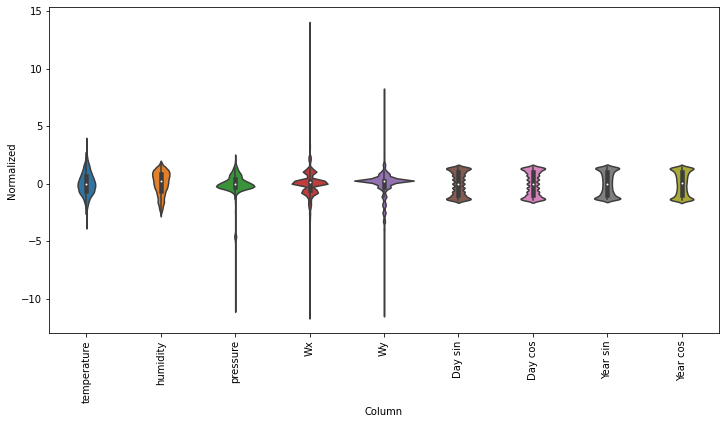

In [386]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [387]:
test_df

,temperature,humidity,pressure,Wx,Wy,Day sin,Day cos,Year sin,Year cos
45013,0.766918,-1.639300,-0.199570,0.120044,-1.179062,1.000088,-1.000246,-0.880063,1.070175
45014,0.349642,-1.455510,-0.199570,-0.246047,-1.157084,0.707187,-1.224978,-0.879300,1.070841
45015,0.006717,-1.685248,-0.032001,0.120044,-0.455741,0.366096,-1.366251,-0.878537,1.071508
45016,-0.087360,0.474292,-0.032001,0.120044,0.267580,0.000060,-1.414436,-0.877774,1.072173
45017,-0.248200,-0.812243,-0.032001,1.059270,0.595960,-0.365975,-1.366251,-0.877010,1.072838
...,...,...,...,...,...,...,...,...,...
45248,0.437649,-1.731196,-0.032001,1.116732,0.503070,1.224839,0.706766,-0.688862,1.210839
45249,0.760849,-1.869039,-0.032001,1.116732,0.503070,1.366124,0.365704,-0.688000,1.211366
45250,0.803335,-1.777143,-0.115786,1.116732,0.503070,1.414313,-0.000301,-0.687139,1.211893
45251,0.756297,-2.190672,-0.032001,-1.861050,-0.227201,1.366124,-0.366306,-0.686276,1.212418


In [388]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [389]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temperature'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temperature']

In [390]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['temperature'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['temperature']

In [391]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [392]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
labels shape: (3, 1, 1)


In [393]:
w2.example = example_inputs, example_labels

In [394]:
def plot(self, model=None, plot_col='temperature', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

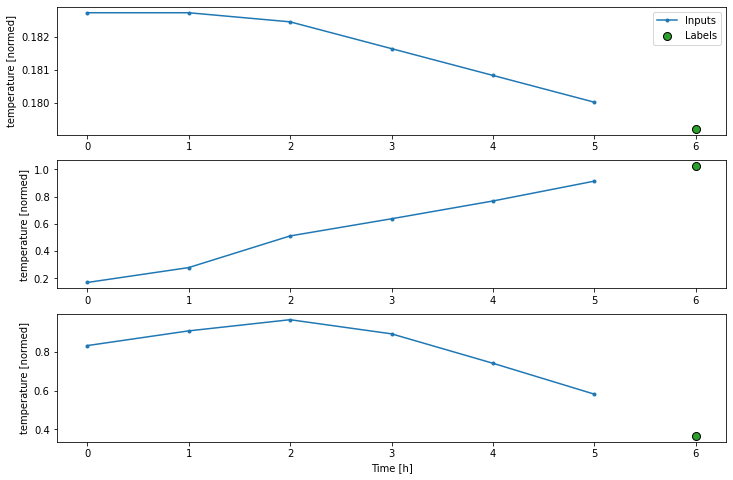

In [395]:
w2.plot()

In [396]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [397]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [398]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [399]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 9)
Labels shape (batch, time, features): (32, 1, 1)


In [400]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temperature'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temperature']

In [401]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


# Single Step Window

In [402]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [403]:
baseline = Baseline(label_index=column_indices['temperature'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

282/282 [==============================] - 2s 4ms/step - loss: 0.0327 - mean_absolute_error: 0.1243


In [404]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['temperature'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['temperature']

In [405]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


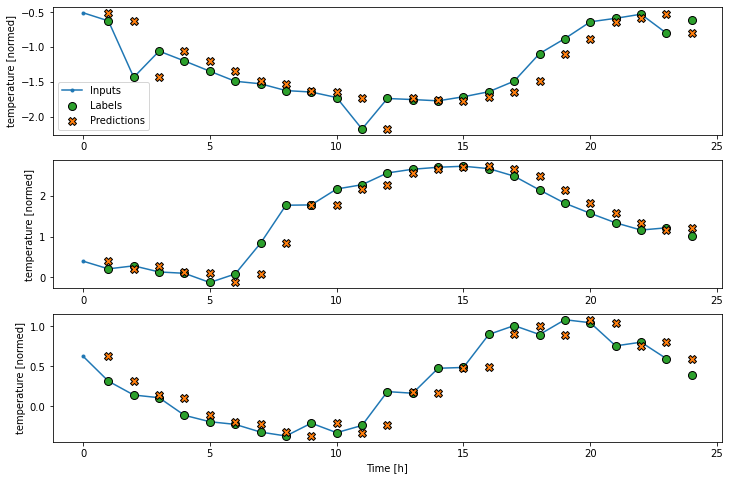

In [406]:
wide_window.plot(baseline)

In [407]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [408]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 9)
Output shape: (32, 1, 1)


In [409]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [410]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1117/1126 [============================>.] - ETA: 0s - loss: 1.0876 - mean_absolute_error: 0.7440

KeyboardInterrupt: 

In [150]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


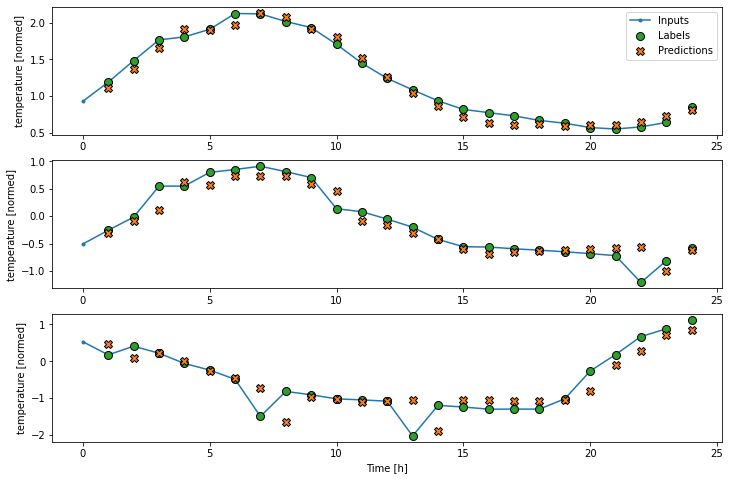

In [151]:
wide_window.plot(linear)

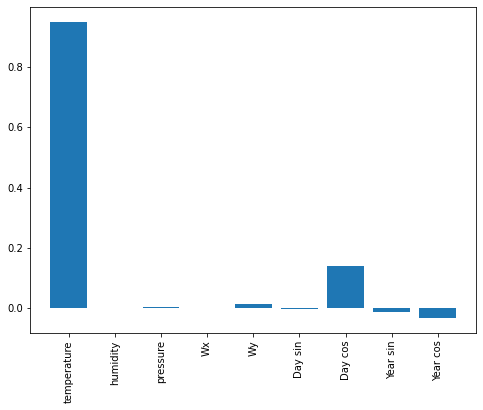

In [152]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [153]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1126/1126 [==============================] - 7s 5ms/step - loss: 0.1365 - mean_absolute_error: 0.2240 - val_loss: 0.0193 - val_mean_absolute_error: 0.0996
Epoch 2/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.0394 - mean_absolute_error: 0.1299 - val_loss: 0.0179 - val_mean_absolute_error: 0.0916
Epoch 3/20
1126/1126 [==============================] - 7s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.1256 - val_loss: 0.0181 - val_mean_absolute_error: 0.0935
Epoch 4/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.0373 - mean_absolute_error: 0.1244 - val_loss: 0.0177 - val_mean_absolute_error: 0.0926
Epoch 5/20
1126/1126 [==============================] - 5s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.1229 - val_loss: 0.0186 - val_mean_absolute_error: 0.0904
Epoch 6/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0186 - mean_absolute_error: 0.0904


# Conv Window

In [155]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['temperature'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['temperature']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

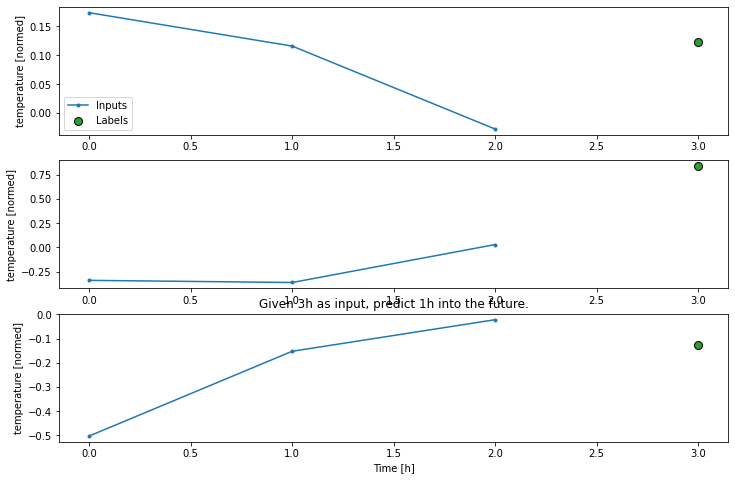

In [156]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [157]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [158]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [159]:
history = compile_and_fit(multi_step_dense, conv_window)


val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
1126/1126 [==============================] - 7s 5ms/step - loss: 0.2334 - mean_absolute_error: 0.3049 - val_loss: 0.0308 - val_mean_absolute_error: 0.1302
Epoch 2/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.0401 - mean_absolute_error: 0.1391 - val_loss: 0.0230 - val_mean_absolute_error: 0.1099
Epoch 3/20
1126/1126 [==============================] - 6s 5ms/step - loss: 0.0364 - mean_absolute_error: 0.1303 - val_loss: 0.0239 - val_mean_absolute_error: 0.1135
Epoch 4/20
282/282 [==============================] - 1s 3ms/step - loss: 0.0233 - mean_absolute_error: 0.1083


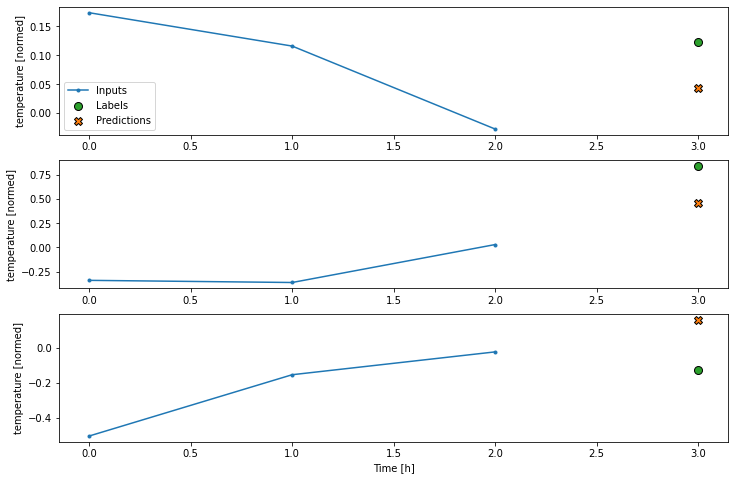

In [160]:
conv_window.plot(multi_step_dense)

In [161]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 9)

ValueError:Input 0 of layer dense_5 is incompatible with the layer: expected axis -1 of input shape to have value 27 but received input with shape (32, 216)


In [166]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [167]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [168]:
history = compile_and_fit(conv_model, conv_window)


val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
1126/1126 [==============================] - 7s 5ms/step - loss: 0.1457 - mean_absolute_error: 0.2455 - val_loss: 0.0288 - val_mean_absolute_error: 0.1266
Epoch 2/20
1126/1126 [==============================] - 13s 11ms/step - loss: 0.0378 - mean_absolute_error: 0.1339 - val_loss: 0.0228 - val_mean_absolute_error: 0.1108
Epoch 3/20
1126/1126 [==============================] - 11s 10ms/step - loss: 0.0353 - mean_absolute_error: 0.1280 - val_loss: 0.0257 - val_mean_absolute_error: 0.1195
Epoch 4/20
1126/1126 [==============================] - 10s 9ms/step - loss: 0.0335 - mean_absolute_error: 0.1244 - val_loss: 0.0199 - val_mean_absolute_error: 0.1016
Epoch 5/20
1126/1126 [==============================] - 7s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.1217 - val_loss: 0.0212 - val_mean_absolute_error: 0.1064
Epoch 6/20
1126/1126 [==============================] - 8s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.1186 - val_loss: 0.0184 - val_mean_absolute_error: 0.0964

In [169]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 9)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [172]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['temperature'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['temperature']

In [173]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 9)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


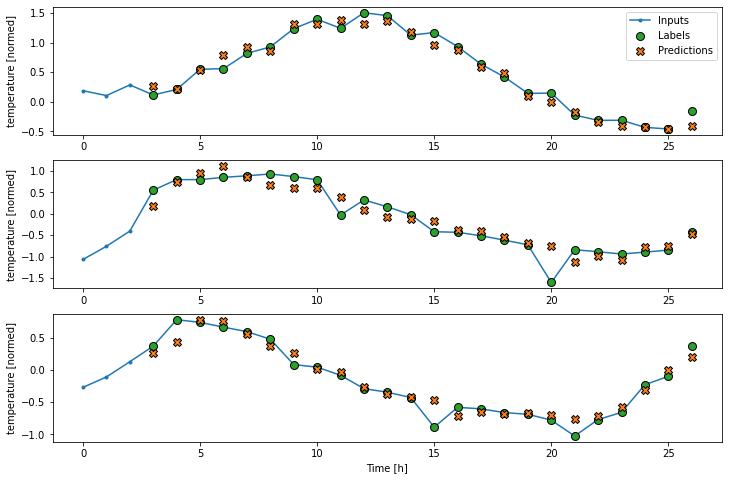

In [174]:
wide_conv_window.plot(conv_model)

In [175]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [176]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


In [177]:
history = compile_and_fit(lstm_model, wide_window)


val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
1125/1125 [==============================] - 22s 16ms/step - loss: 0.1861 - mean_absolute_error: 0.2768 - val_loss: 0.0212 - val_mean_absolute_error: 0.1018
Epoch 2/20
1125/1125 [==============================] - 19s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.1210 - val_loss: 0.0162 - val_mean_absolute_error: 0.0867
Epoch 3/20
1125/1125 [==============================] - 16s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.1111 - val_loss: 0.0148 - val_mean_absolute_error: 0.0827
Epoch 4/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.1068 - val_loss: 0.0146 - val_mean_absolute_error: 0.0812
Epoch 5/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.1033 - val_loss: 0.0150 - val_mean_absolute_error: 0.0821
Epoch 6/20
281/281 [==============================] - 2s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0818


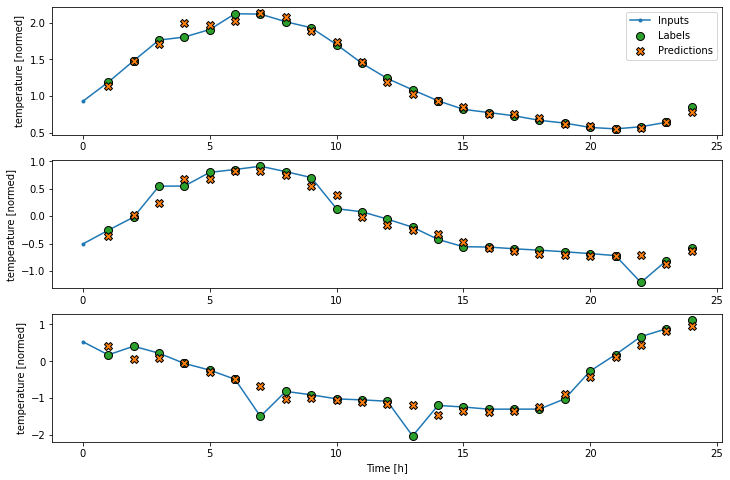

In [178]:
wide_window.plot(lstm_model)

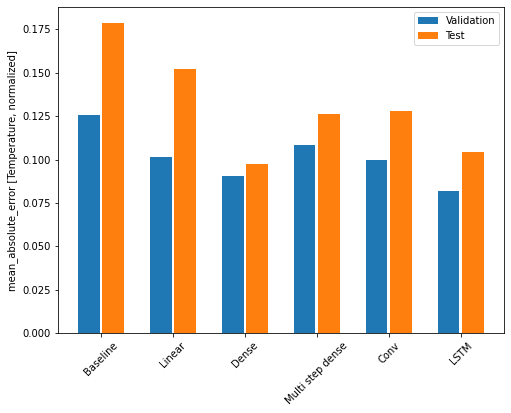

In [179]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Temperature, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

# Wide Window 24hrs

In [180]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 9)
Labels shape (batch, time, features): (32, 24, 9)


In [181]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [182]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

281/281 [==============================] - 2s 4ms/step - loss: 0.4657 - mean_absolute_error: 0.2922


In [183]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [184]:
history = compile_and_fit(dense, single_step_window)


val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1126/1126 [==============================] - 7s 5ms/step - loss: 0.2999 - mean_absolute_error: 0.3168 - val_loss: 0.3225 - val_mean_absolute_error: 0.2531
Epoch 2/20
1126/1126 [==============================] - 6s 5ms/step - loss: 0.1719 - mean_absolute_error: 0.1861 - val_loss: 0.3183 - val_mean_absolute_error: 0.2461
Epoch 3/20
1126/1126 [==============================] - 6s 5ms/step - loss: 0.1692 - mean_absolute_error: 0.1810 - val_loss: 0.3155 - val_mean_absolute_error: 0.2446
Epoch 4/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.1669 - mean_absolute_error: 0.1781 - val_loss: 0.3150 - val_mean_absolute_error: 0.2432
Epoch 5/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.1656 - mean_absolute_error: 0.1758 - val_loss: 0.3140 - val_mean_absolute_error: 0.2404
Epoch 6/20
1126/1126 [==============================] - 5s 5ms/step - loss: 0.1637 - mean_absolute_error: 0.1739 - val_loss: 0.3136 - val_mean_absolute_error: 0.2400
Epoc

In [186]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)


val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

Epoch 1/20
1125/1125 [==============================] - 21s 16ms/step - loss: 0.3681 - mean_absolute_error: 0.3798 - val_loss: 0.3095 - val_mean_absolute_error: 0.2525
Epoch 2/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.1583 - mean_absolute_error: 0.1792 - val_loss: 0.3022 - val_mean_absolute_error: 0.2394
Epoch 3/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.1518 - mean_absolute_error: 0.1684 - val_loss: 0.3009 - val_mean_absolute_error: 0.2358
Epoch 4/20
1125/1125 [==============================] - 18s 16ms/step - loss: 0.1487 - mean_absolute_error: 0.1642 - val_loss: 0.3007 - val_mean_absolute_error: 0.2343
Epoch 5/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.1464 - mean_absolute_error: 0.1618 - val_loss: 0.3008 - val_mean_absolute_error: 0.2335
Epoch 6/20
281/281 [==============================] - 2s 7ms/step - loss: 0.3013 - mean_absolute_error: 0.2336

CPU times: user 3min 27s, sys: 39.4 s, total: 4m

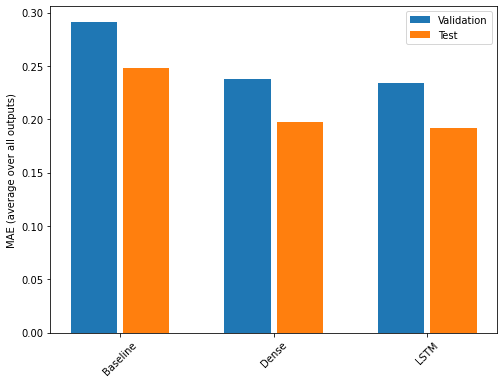

In [187]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

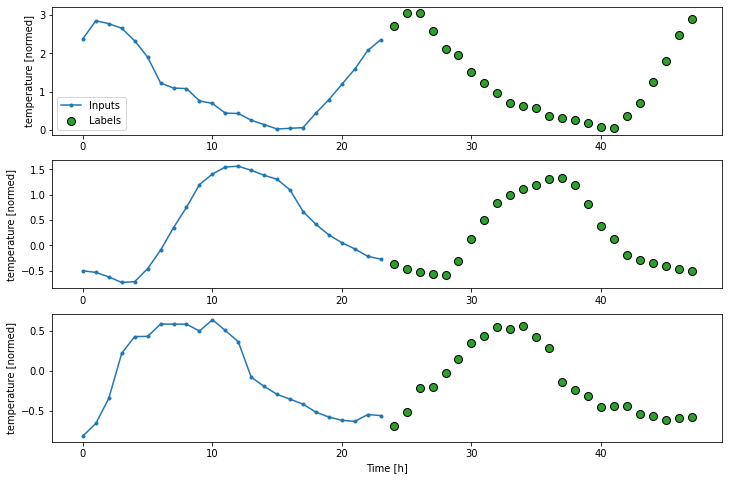

In [188]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

280/280 [==============================] - 1s 4ms/step - loss: 1.3691 - mean_absolute_error: 0.7083


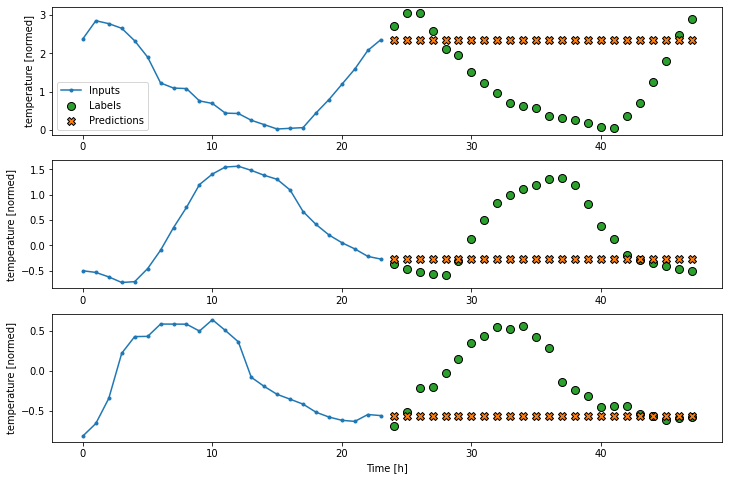

In [189]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

280/280 [==============================] - 1s 4ms/step - loss: 0.7268 - mean_absolute_error: 0.3677


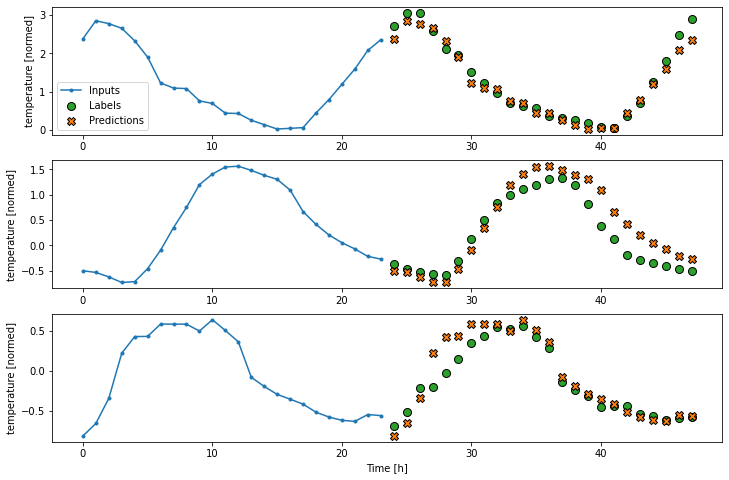

In [190]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

Epoch 1/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.6328 - mean_absolute_error: 0.5893 - val_loss: 0.4725 - val_mean_absolute_error: 0.3840
Epoch 2/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2968 - mean_absolute_error: 0.3076 - val_loss: 0.4478 - val_mean_absolute_error: 0.3166
Epoch 3/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2825 - mean_absolute_error: 0.2566 - val_loss: 0.4467 - val_mean_absolute_error: 0.3051
Epoch 4/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2821 - mean_absolute_error: 0.2491 - val_loss: 0.4466 - val_mean_absolute_error: 0.3043
Epoch 5/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2825 - mean_absolute_error: 0.2488 - val_loss: 0.4468 - val_mean_absolute_error: 0.3044
Epoch 6/20
280/280 [==============================] - 1s 4ms/step - loss: 0.4467 - mean_absolute_error: 0.3043


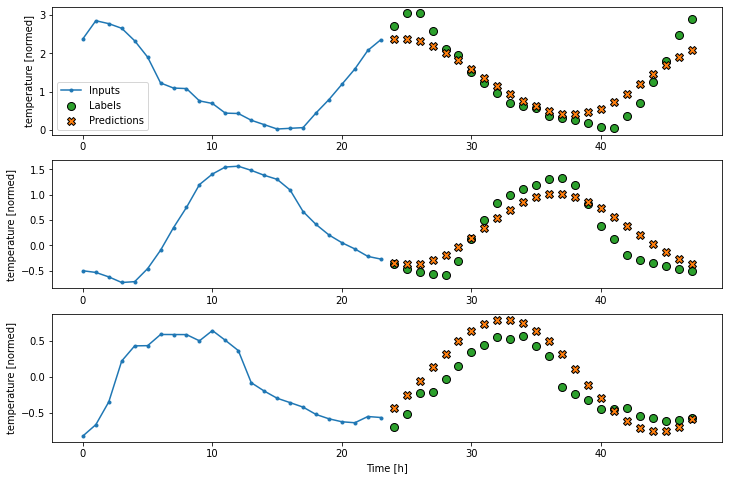

In [191]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

Epoch 1/20
1124/1124 [==============================] - 8s 6ms/step - loss: 0.3413 - mean_absolute_error: 0.3165 - val_loss: 0.4345 - val_mean_absolute_error: 0.3069
Epoch 2/20
1124/1124 [==============================] - 7s 6ms/step - loss: 0.2642 - mean_absolute_error: 0.2419 - val_loss: 0.4348 - val_mean_absolute_error: 0.3056
Epoch 3/20
1124/1124 [==============================] - 7s 6ms/step - loss: 0.2596 - mean_absolute_error: 0.2384 - val_loss: 0.4345 - val_mean_absolute_error: 0.3044
Epoch 4/20
1124/1124 [==============================] - 7s 6ms/step - loss: 0.2556 - mean_absolute_error: 0.2358 - val_loss: 0.4365 - val_mean_absolute_error: 0.3053
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 0.4406 - mean_absolute_error: 0.3064


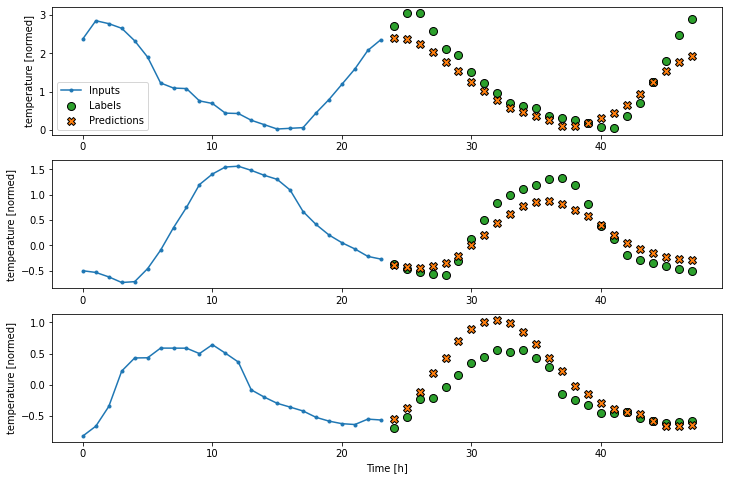

In [192]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)


multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

Epoch 1/20
1124/1124 [==============================] - 7s 6ms/step - loss: 0.3408 - mean_absolute_error: 0.3226 - val_loss: 0.4271 - val_mean_absolute_error: 0.3061
Epoch 2/20
1124/1124 [==============================] - 6s 6ms/step - loss: 0.2532 - mean_absolute_error: 0.2404 - val_loss: 0.4254 - val_mean_absolute_error: 0.3048
Epoch 3/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2491 - mean_absolute_error: 0.2374 - val_loss: 0.4252 - val_mean_absolute_error: 0.3047
Epoch 4/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.2470 - mean_absolute_error: 0.2354 - val_loss: 0.4261 - val_mean_absolute_error: 0.3056
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 0.4276 - mean_absolute_error: 0.3057


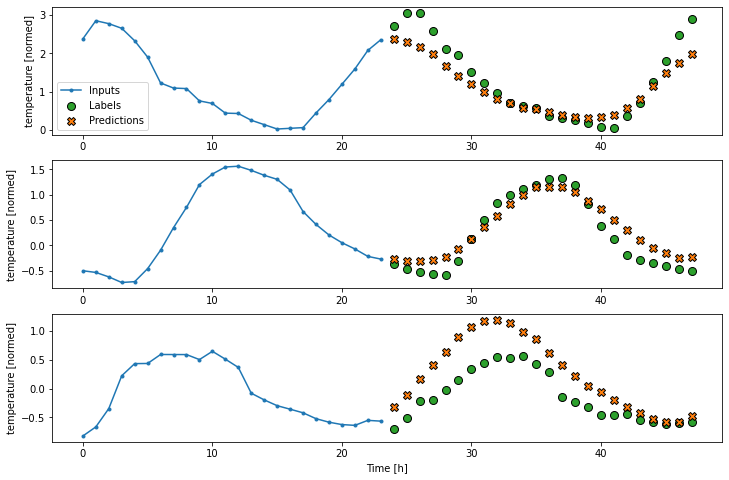

In [193]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

Epoch 1/20
1124/1124 [==============================] - 24s 18ms/step - loss: 0.4651 - mean_absolute_error: 0.4420 - val_loss: 0.4319 - val_mean_absolute_error: 0.3390
Epoch 2/20
1124/1124 [==============================] - 18s 16ms/step - loss: 0.2411 - mean_absolute_error: 0.2562 - val_loss: 0.4184 - val_mean_absolute_error: 0.3233
Epoch 3/20
1124/1124 [==============================] - 25s 22ms/step - loss: 0.2300 - mean_absolute_error: 0.2420 - val_loss: 0.4222 - val_mean_absolute_error: 0.3224
Epoch 4/20
280/280 [==============================] - 2s 7ms/step - loss: 0.4220 - mean_absolute_error: 0.3195


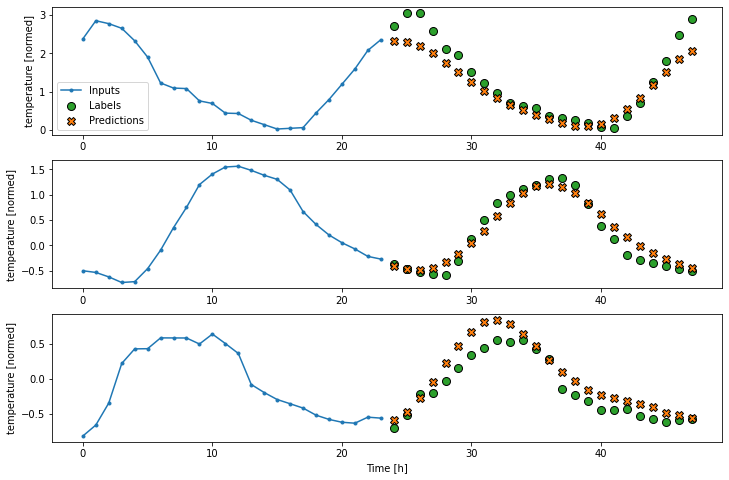

In [194]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [195]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [196]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [197]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [198]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 9])

In [199]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [200]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 9)


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x146d46950>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


Epoch 1/20
1124/1124 [==============================] - 48s 32ms/step - loss: 0.2161 - mean_absolute_error: 0.2334 - val_loss: 0.4319 - val_mean_absolute_error: 0.3279
Epoch 2/20
1124/1124 [==============================] - 31s 28ms/step - loss: 0.2145 - mean_absolute_error: 0.2319 - val_loss: 0.4329 - val_mean_absolute_error: 0.3278
Epoch 3/20
1124/1124 [==============================] - 27s 24ms/step - loss: 0.2134 - mean_absolute_error: 0.2312 - val_loss: 0.4314 - val_mean_absolute_error: 0.3263
Epoch 4/20
1124/1124 [==============================] - 26s 23ms/step - loss: 0.2125 - mean_absolute_error: 0.2305 - val_loss: 0.4340 - val_mean_absolute_error: 0.3265
Epoch 5/20
1124/1124 [==============================] - 25s 22ms/step - loss: 0.2125 - mean_absolute_error: 0.2307 - val_loss: 0.4292 - val_mean_absolute_error: 0.3259
Epoch 6/20
1124/1124 [==============================] - 23s 20ms/step - loss: 0.2112 - mean_absolute_error: 0.2300 - val_loss: 0.4346 - val_mean_absolute_error:

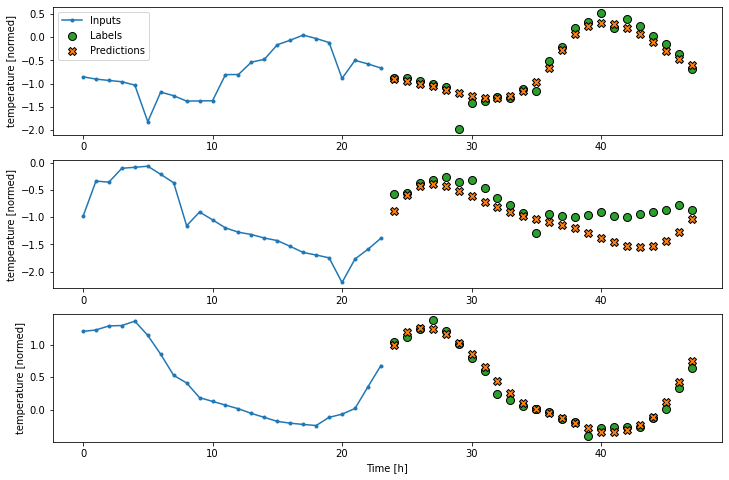

In [277]:
history = compile_and_fit(feedback_model, multi_window)



multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=5)
multi_window.plot(feedback_model)

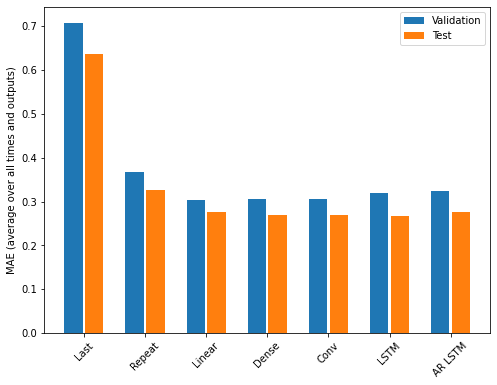

In [202]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [203]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.6360
Repeat  : 0.3265
Linear  : 0.2766
Dense   : 0.2692
Conv    : 0.2694
LSTM    : 0.2664
AR LSTM : 0.2750


In [411]:
test_df.columns

Index(['temperature', 'humidity', 'pressure', 'Wx', 'Wy', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

# Feature Importance

In [412]:
from numpy.random import default_rng



In [415]:
def shuffle_column(column,shuffle_df=test_df.reset_index()):
    new_df=shuffle_df.drop(columns=['index'])
    rng = default_rng()
    randoms = rng.choice(len(shuffle_df), size=len(shuffle_df), replace=False)
    new_df[column]=list(new_df[column][list(randoms)])
    return new_df

Epoch 1/20
1124/1124 [==============================] - 23s 17ms/step - loss: 0.4703 - mean_absolute_error: 0.4442 - val_loss: 0.4352 - val_mean_absolute_error: 0.3430
Epoch 2/20
1124/1124 [==============================] - 25s 22ms/step - loss: 0.2440 - mean_absolute_error: 0.2598 - val_loss: 0.4184 - val_mean_absolute_error: 0.3248
Epoch 3/20
1124/1124 [==============================] - 24s 21ms/step - loss: 0.2320 - mean_absolute_error: 0.2443 - val_loss: 0.4162 - val_mean_absolute_error: 0.3193
Epoch 4/20
1124/1124 [==============================] - 20s 18ms/step - loss: 0.2271 - mean_absolute_error: 0.2381 - val_loss: 0.4176 - val_mean_absolute_error: 0.3170
Epoch 5/20
280/280 [==============================] - 2s 6ms/step - loss: 0.4204 - mean_absolute_error: 0.3183
Epoch 1/20
1124/1124 [==============================] - 23s 17ms/step - loss: 0.4748 - mean_absolute_error: 0.4485 - val_loss: 0.4334 - val_mean_absolute_error: 0.3428
Epoch 2/20
1124/1124 [===========================

Epoch 9/20
1124/1124 [==============================] - 25s 22ms/step - loss: 0.2138 - mean_absolute_error: 0.2262 - val_loss: 0.4050 - val_mean_absolute_error: 0.3120
Epoch 10/20
280/280 [==============================] - 3s 11ms/step - loss: 0.4071 - mean_absolute_error: 0.3125
Epoch 1/20
1124/1124 [==============================] - 32s 22ms/step - loss: 0.4679 - mean_absolute_error: 0.4441 - val_loss: 0.4336 - val_mean_absolute_error: 0.3420
Epoch 2/20
1124/1124 [==============================] - 20s 18ms/step - loss: 0.2437 - mean_absolute_error: 0.2578 - val_loss: 0.4167 - val_mean_absolute_error: 0.3240
Epoch 3/20
1124/1124 [==============================] - 19s 17ms/step - loss: 0.2317 - mean_absolute_error: 0.2430 - val_loss: 0.4123 - val_mean_absolute_error: 0.3161
Epoch 4/20
1124/1124 [==============================] - 20s 17ms/step - loss: 0.2274 - mean_absolute_error: 0.2370 - val_loss: 0.4110 - val_mean_absolute_error: 0.3146
Epoch 5/20
1124/1124 [=========================

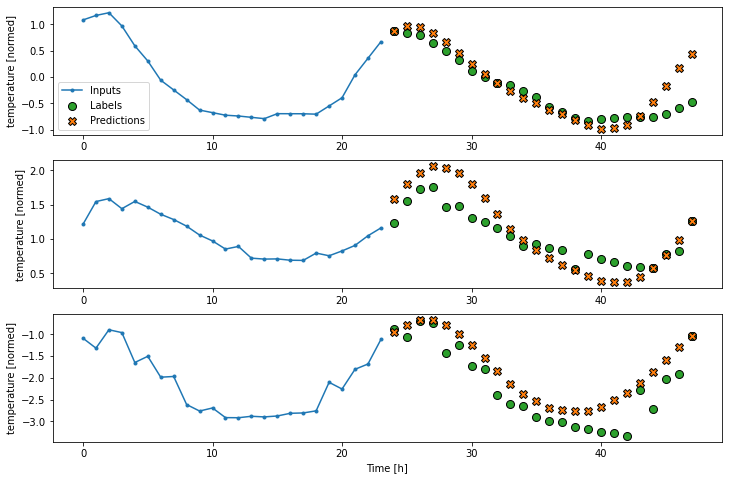

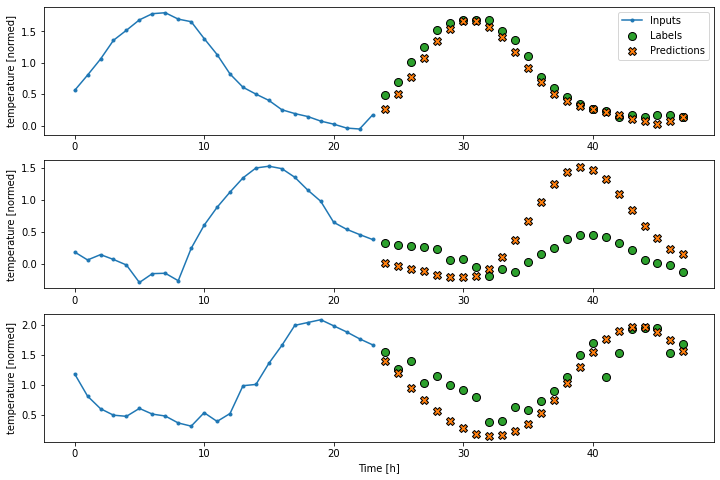

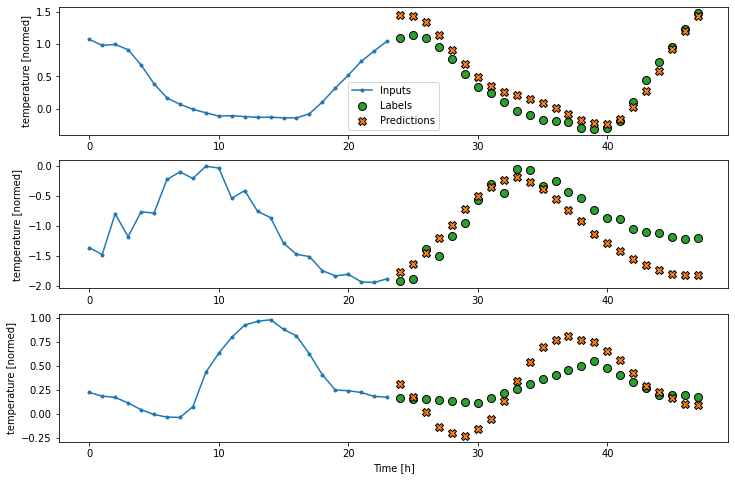

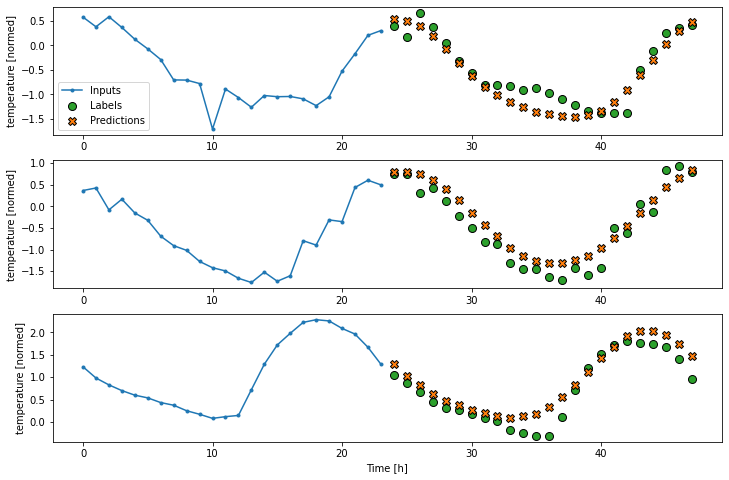

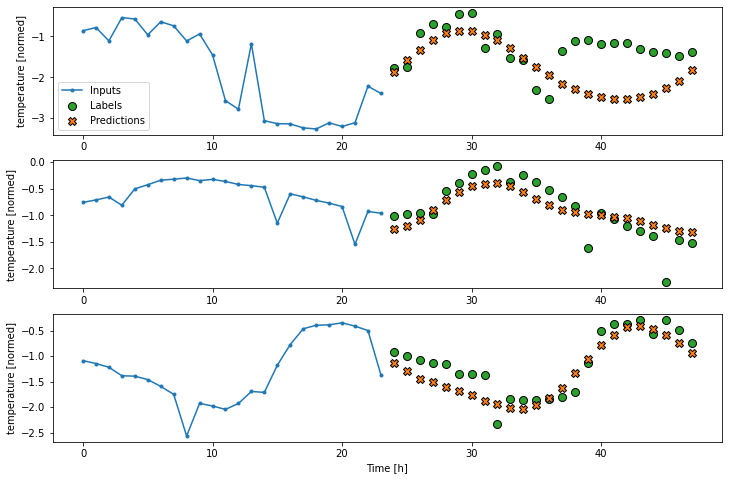

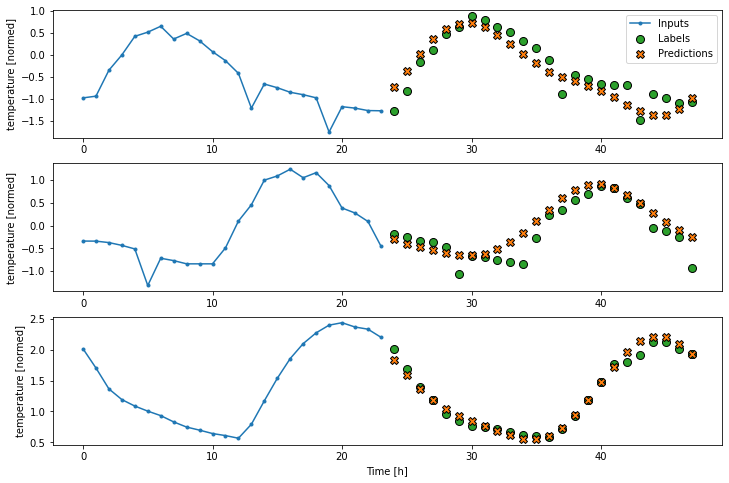

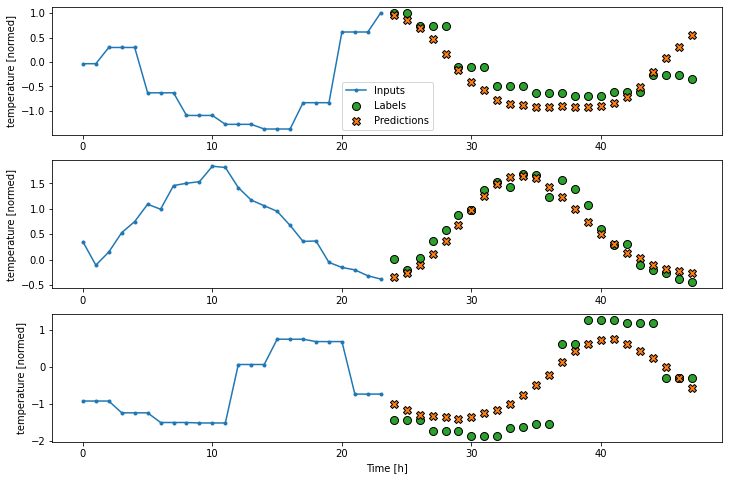

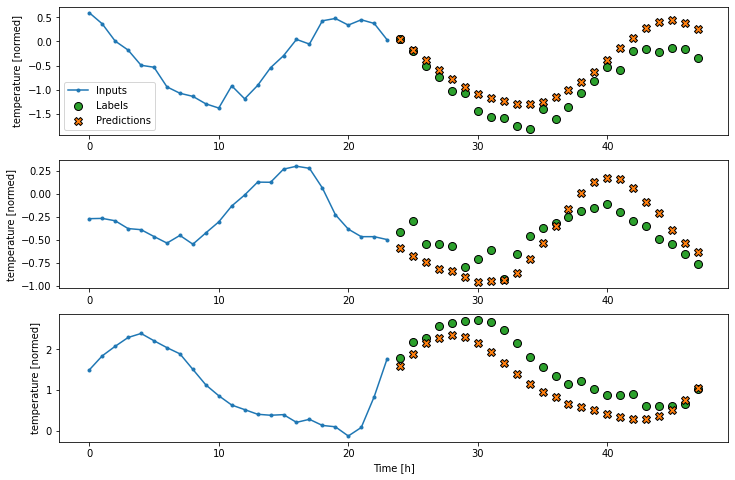

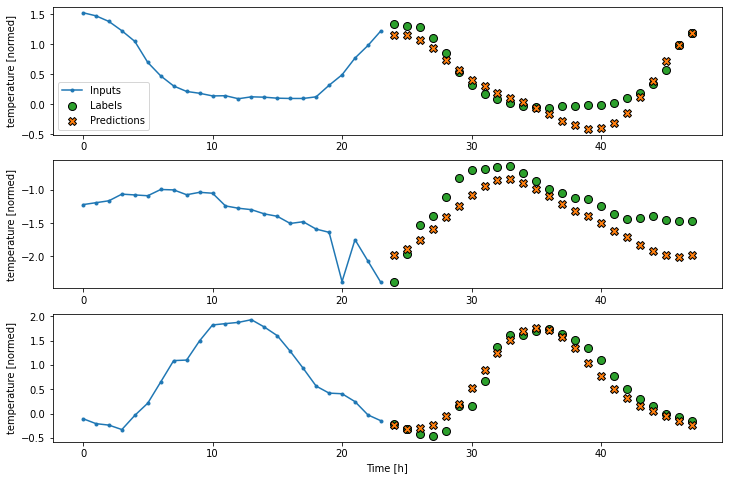

In [416]:
multi_val_shuffle_performance = {}
multi_shuffle_performance = {}
for column in test_df.columns:
    OUT_STEPS = 24
    multi_window = WindowGenerator(input_width=24,
                                   label_width=OUT_STEPS,
                                   shift=OUT_STEPS,
                                  test_df=shuffle_column(column))
    multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

    history = compile_and_fit(multi_lstm_model, multi_window)

    multi_val_shuffle_performance[column] = multi_lstm_model.evaluate(multi_window.val)
    multi_shuffle_performance[column] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
    multi_window.plot(multi_lstm_model)
    



In [418]:
for name, value in multi_shuffle_performance.items():
  print(f'{name:8s}: {value[1]/.2664:0.4f}')

temperature: 1.2266
humidity: 1.2752
pressure: 0.9966
Wx      : 1.1019
Wy      : 1.0365
Day sin : 1.7522
Day cos : 1.8135
Year sin: 1.0095
Year cos: 0.9953


<BarContainer object of 8 artists>

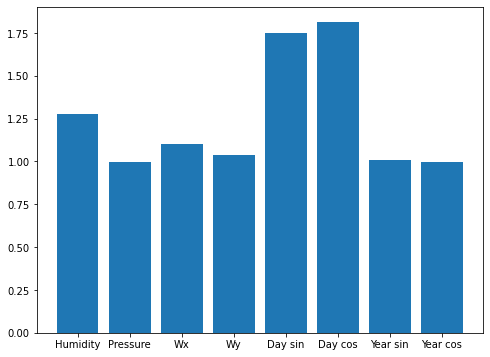

In [436]:
plt.bar(['Humidity','Pressure','Wx','Wy','Day sin','Day cos','Year sin','Year cos'],[1.275,.9966,1.10,1.036,1.752,1.813,1.01,.9953])

# Wide Window 10 days

Total window size: 480
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

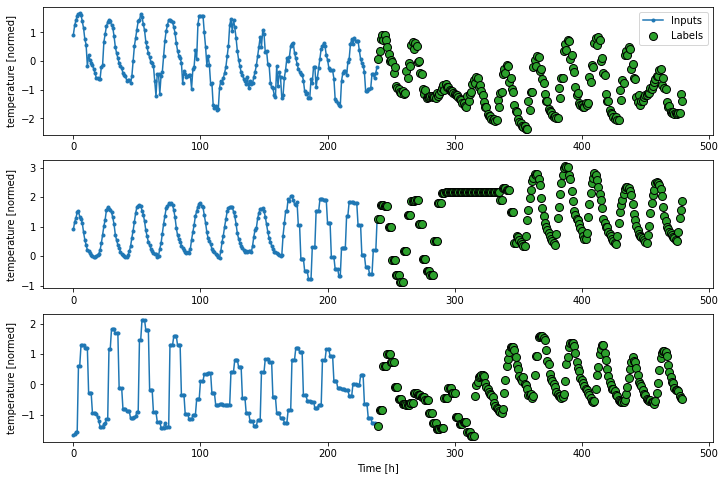

In [419]:
OUT_STEPS = 240
multi_window = WindowGenerator(input_width=240,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

267/267 [==============================] - 2s 6ms/step - loss: 1.6125 - mean_absolute_error: 0.8066


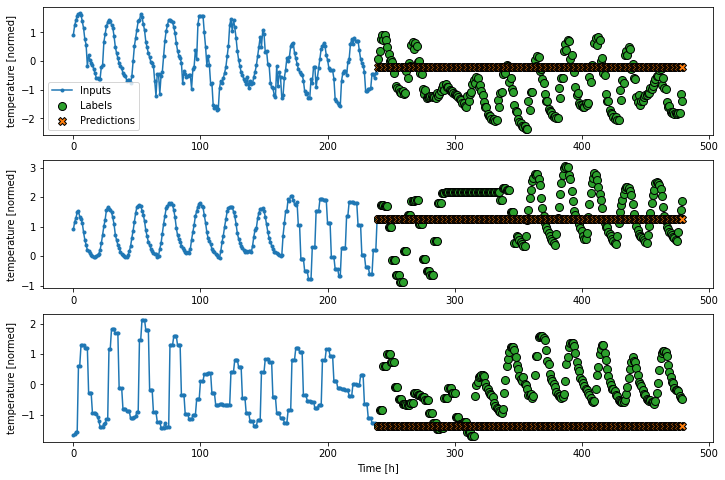

In [420]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

267/267 [==============================] - 2s 6ms/step - loss: 1.0050 - mean_absolute_error: 0.5044


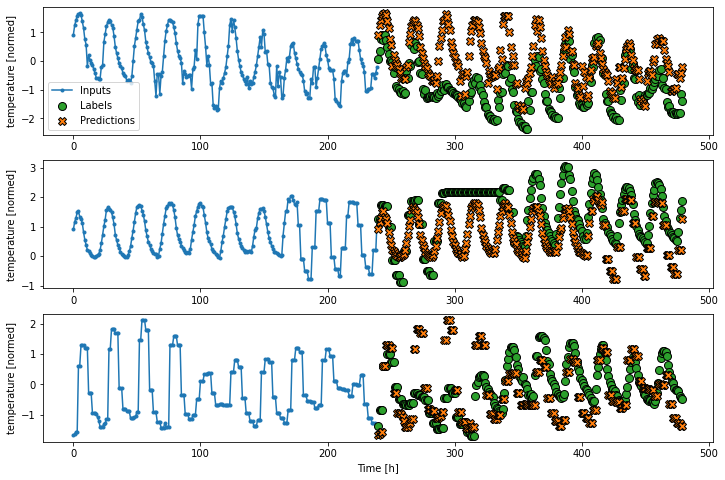

In [421]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

Epoch 1/20
1111/1111 [==============================] - 10s 8ms/step - loss: 0.6668 - mean_absolute_error: 0.6054 - val_loss: 0.5731 - val_mean_absolute_error: 0.4298
Epoch 2/20
1111/1111 [==============================] - 7s 6ms/step - loss: 0.3749 - mean_absolute_error: 0.3549 - val_loss: 0.5561 - val_mean_absolute_error: 0.3682
Epoch 3/20
1111/1111 [==============================] - 7s 6ms/step - loss: 0.3632 - mean_absolute_error: 0.3091 - val_loss: 0.5557 - val_mean_absolute_error: 0.3575
Epoch 4/20
1111/1111 [==============================] - 8s 7ms/step - loss: 0.3626 - mean_absolute_error: 0.3021 - val_loss: 0.5558 - val_mean_absolute_error: 0.3568
Epoch 5/20
267/267 [==============================] - 1s 5ms/step - loss: 0.5559 - mean_absolute_error: 0.3572


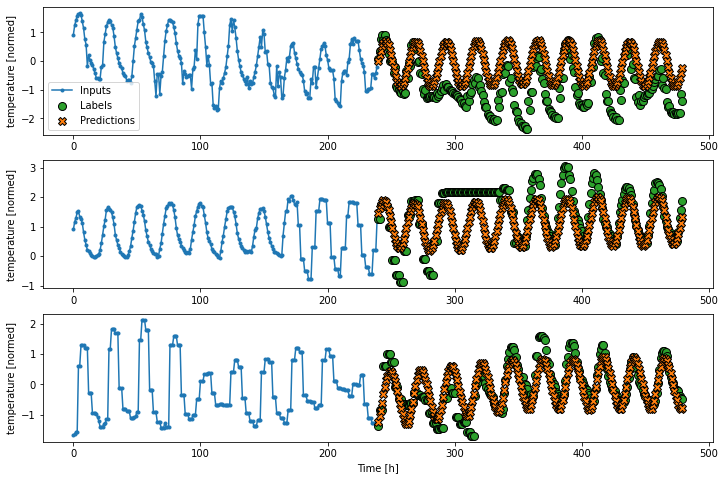

In [422]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

Epoch 1/20
1111/1111 [==============================] - 27s 23ms/step - loss: 0.4099 - mean_absolute_error: 0.3614 - val_loss: 0.5463 - val_mean_absolute_error: 0.3624
Epoch 2/20
1111/1111 [==============================] - 25s 22ms/step - loss: 0.3392 - mean_absolute_error: 0.2953 - val_loss: 0.5418 - val_mean_absolute_error: 0.3598
Epoch 3/20
1111/1111 [==============================] - 24s 21ms/step - loss: 0.3333 - mean_absolute_error: 0.2913 - val_loss: 0.5411 - val_mean_absolute_error: 0.3580
Epoch 4/20
1111/1111 [==============================] - 22s 20ms/step - loss: 0.3284 - mean_absolute_error: 0.2877 - val_loss: 0.5457 - val_mean_absolute_error: 0.3604
Epoch 5/20
267/267 [==============================] - 2s 8ms/step - loss: 0.5448 - mean_absolute_error: 0.3586


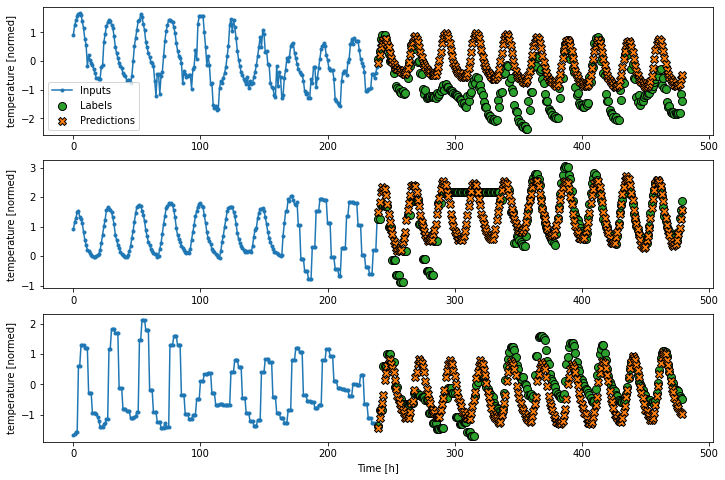

In [423]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)


multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

Epoch 1/20
1111/1111 [==============================] - 28s 18ms/step - loss: 0.4150 - mean_absolute_error: 0.3675 - val_loss: 0.5371 - val_mean_absolute_error: 0.3618
Epoch 2/20
1111/1111 [==============================] - 17s 16ms/step - loss: 0.3351 - mean_absolute_error: 0.2954 - val_loss: 0.5360 - val_mean_absolute_error: 0.3615
Epoch 3/20
1111/1111 [==============================] - 17s 15ms/step - loss: 0.3299 - mean_absolute_error: 0.2926 - val_loss: 0.5352 - val_mean_absolute_error: 0.3622
Epoch 4/20
1111/1111 [==============================] - 19s 17ms/step - loss: 0.3262 - mean_absolute_error: 0.2903 - val_loss: 0.5342 - val_mean_absolute_error: 0.3610
Epoch 5/20
1111/1111 [==============================] - 25s 22ms/step - loss: 0.3217 - mean_absolute_error: 0.2876 - val_loss: 0.5379 - val_mean_absolute_error: 0.3615
Epoch 6/20
267/267 [==============================] - 3s 11ms/step - loss: 0.5417 - mean_absolute_error: 0.3634


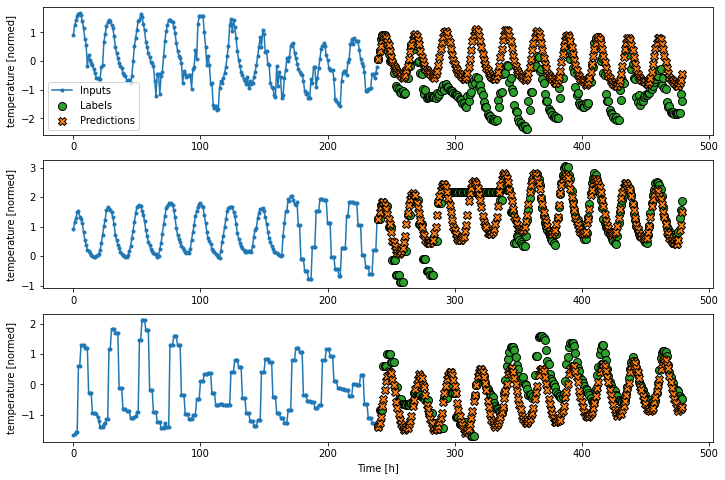

In [424]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

Epoch 1/20
1111/1111 [==============================] - 176s 154ms/step - loss: 0.5155 - mean_absolute_error: 0.4642 - val_loss: 0.5411 - val_mean_absolute_error: 0.3927
Epoch 2/20
1111/1111 [==============================] - 141s 127ms/step - loss: 0.3244 - mean_absolute_error: 0.3118 - val_loss: 0.5236 - val_mean_absolute_error: 0.3786
Epoch 3/20
1111/1111 [==============================] - 133s 120ms/step - loss: 0.3116 - mean_absolute_error: 0.3024 - val_loss: 0.5398 - val_mean_absolute_error: 0.3891
Epoch 4/20
267/267 [==============================] - 9s 35ms/step - loss: 0.5420 - mean_absolute_error: 0.3956


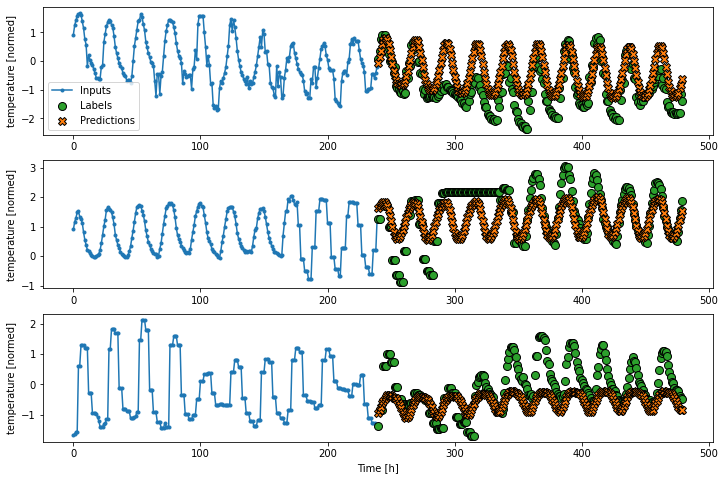

In [425]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

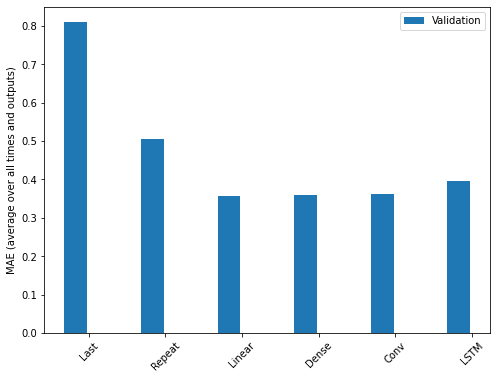

In [433]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]


plt.bar(x - 0.17, val_mae, width, label='Validation')

plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()